In [26]:
import sys
print(sys.executable)
neural_struct_dir = '/mnt/g/PythonWorkspace/neural-structural-optimization/'
sys.path.insert(0, neural_struct_dir)
# hardcoded
cur_file_dir = '/mnt/g/PythonWorkspace/neural-structural-optimization/projects'
sys.path.insert(0, cur_file_dir)

/home/shushu/install/anaconda3/envs/neural-struct/bin/python


In [27]:
import seaborn
import matplotlib.pyplot as plt
import xarray
import tensorflow as tf

from neural_structural_optimization import problems
from neural_structural_optimization import train
from neural_structural_optimization.models import *

from cnn_sketch import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
cur_file_dir = '/mnt/g/PythonWorkspace/neural-structural-optimization/projects'

In [6]:
import sys
sys.executable

'/home/shushu/install/anaconda3/envs/neural-struct/bin/python'

## Random Image as Input

In [29]:
problem = problems.mbb_beam(width=64, height=32, density=0.5)
args = topo_api.specified_task(problem)

In [38]:
cnns1 = Pix2PixCNNSketch(args=args)
# cnns1.core_model.summary()

In [39]:
ds_cnns1 = train.train_lbfgs(cnns1, 100)

Text(0.5, 0, 'Optimization step')

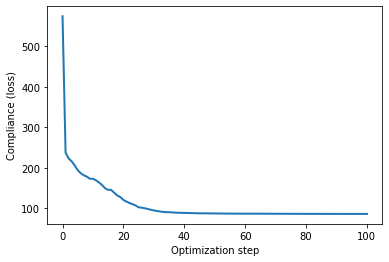

In [40]:
ds_cnns1.loss.transpose().to_pandas().cummin().loc[:100].plot(linewidth=2)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')

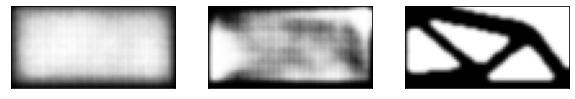

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(10,5),subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(ds_cnns1.design.sel(step=1), cmap='Greys')
ax[1].imshow(ds_cnns1.design.sel(step=10), cmap='Greys')
ax[2].imshow(ds_cnns1.design.sel(step=100), cmap='Greys')

### Plot results of intermidate layers

In [42]:
# extractor = tf.keras.Model(inputs=cnns1.core_model.inputs,
#                         outputs=[layer.output for layer in cnns1.core_model.layers])
# features = extractor(cnns1.z)
# i = 1
# for e in features:
#     print('layer:{:3}, shape:{}'.format(i, e.shape))
#     i += 1

In [43]:
# fig, ax = plt.subplots(figsize=(6,3),subplot_kw={'xticks': [], 'yticks': []})
# ax.imshow(np.squeeze(features[0]), cmap='Greys')

In [44]:
# fig, ax = plt.subplots(4, 4, figsize=(10,5),subplot_kw={'xticks': [], 'yticks': []})
# for i in range(16):
#     ax[i//4, i%4].imshow(np.squeeze(features[4])[:,:,i], cmap='Greys')

In [45]:
# fig, ax = plt.subplots(4, 4, figsize=(10,5),subplot_kw={'xticks': [], 'yticks': []})
# for i in range(16):
#     ax[i//4, i%4].imshow(np.squeeze(features[37])[:,:,i], cmap='Greys')

In [46]:
# fig, ax = plt.subplots(4, 4, figsize=(10,5),subplot_kw={'xticks': [], 'yticks': []})
# for i in range(16):
#     ax[i//4, i%4].imshow(np.squeeze(features[89])[:,:,i], cmap='Greys')

### Save the model weights

In [47]:
import os
saved_model_dir = os.path.join(cur_file_dir, 'saved_models')
cnns1.save_weights(os.path.join(saved_model_dir,'pix2pix_cnns1'))

## Use half of the model

In [48]:
cnns2 = CNNSketch(args=args)

In [51]:
ds_cnns2 = train.train_lbfgs(cnns2, 100)

Text(0.5, 0, 'Optimization step')

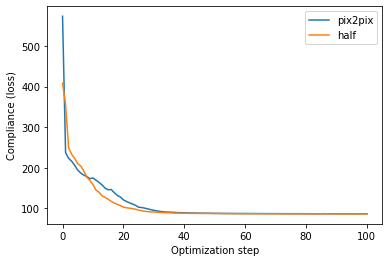

In [64]:
plt.plot(ds_cnns1.loss, label='pix2pix')
plt.plot(ds_cnns2.loss, label='half')
plt.legend()
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')

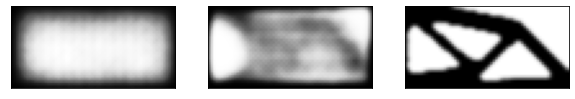

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(10,5),subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(ds_cnns2.design.sel(step=1), cmap='Greys')
ax[1].imshow(ds_cnns2.design.sel(step=10), cmap='Greys')
ax[2].imshow(ds_cnns2.design.sel(step=100), cmap='Greys')